## Predict Customer Personality to Boost Marketing Campaign

**Table of Content:**

- Introduction
- Load Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Modeling
- Save Model

# Introduction

**Background**

Dengan memahami apa yang pelanggan sukai, butuhkan, dan bagaimana mereka membeli produk kita, kita bisa memberikan layanan yang lebih baik sesuai dengan kebutuhan mereka. Dengan memahami pelanggan, kita bisa memberikan pengalaman yang lebih menyenangkan dan memuaskan bagi mereka. Hal ini akan membuat pelanggan lebih puas dan akhirnya akan meningkatkan penjualan kita. Untuk memahami pelanggan, kita bisa menggunakan metode pengelompokkan. Dengan pengelompokkan, kita bisa membagi pelanggan menjadi kelompok-kelompok berdasarkan karakteristiknya. Hal ini akan membantu kita menyusun strategi penjualan yang lebih efektif dan sesuai dengan kebutuhan setiap kelompok pelanggan. Oleh karena itu, memahami pelanggan adalah hal yang penting untuk meningkatkan penjualan dan mencapai kesuksesan jangka panjang bagi perusahaan.

**Goal**

Tujuan dari analisis profil dan perilaku pelanggan dengan pendekatan clustering adalah untuk meningkatkan pemahaman perusahaan tentang pelanggan. Dengan pemahaman yang lebih baik tentang pelanggan, perusahaan dapat menyediakan layanan yang lebih personal, meningkatkan performa penjualan, dan membangun hubungan yang kuat dengan pelanggan.

**Objective**

Berikut adalah objective dari analisis profil dan perilaku pelanggan dengan pendekatan clustering, dalam kalimat yang lebih mudah dipahami:

- Membuat model machine learning yang dapat mengelompokkan pelanggan berdasarkan karakteristik dan perilaku mereka.
Tujuan pertama adalah membuat model yang dapat membagi pelanggan menjadi kelompok-kelompok berdasarkan ciri-ciri dan cara mereka berperilaku.

- Mengekstraksi insight yang lebih mendalam tentang profil dan perilaku pelanggan.
Tujuan kedua adalah memahami lebih lanjut tentang pelanggan, seperti apa yang mereka sukai, butuhkan, dan bagaimana mereka berperilaku.

- Menentukan strategi bisnis yang efektif dari hasil clustering.
Tujuan ketiga adalah menggunakan pemahaman tentang pelanggan untuk membuat strategi bisnis yang lebih efektif.

**Business Matric**

Conversion Rate

| Feature | Description |
| --- | --- |
| `ID` | ID unik dari setiap pelanggan |
| `Year_Birth` | tahun kelahiran pelanggan |
| `Dt_Customer` | tanggal pendaftaran pelanggan dengan perusahaan (gabung member) |
| `Education` | tingkat pendidikan pelanggan |
| `Marital_Status` | status pernikahan pelanggan |
| `Kidhom` | jumlah anak kecil dalam rumah tangga pelanggan |
| `Teenhom` | jumlah remaja dalam rumah tangga pelanggan |
| `Income` | pendapatan rumah tangga pelanggan per tahun |
| `MntFishProducts` | jumlah yang dibelanjakan untuk produk ikan dalam 2 tahun terakhir |
| `MntMeatProducts` | jumlah yang dibelanjakan untuk produk daging dalam 2 tahun terakhir |
| `MntFruits` | jumlah yang dibelanjakan untuk produk buah-buahan dalam 2 tahun terakhir |
| `MntSweetProducts` | jumlah yang dibelanjakan untuk produk manis dalam 2 tahun terakhir |
| `MntWines` | jumlah yang dibelanjakan untuk produk anggur dalam 2 tahun terakhir |
| `MntGoldProds` | jumlah yang dibelanjakan untuk produk emas dalam 2 tahun terakhir |
| `NumDealsPurchases` | jumlah pembelian yang dilakukan dengan diskon |
| `NumCatalogPurchases` | jumlah pembelian yang dilakukan dengan menggunakan katalog (membeli barang yang akan dikirim melalui pos) |
| `NumStorePurchases` | jumlah pembelian yang dilakukan secara langsung di toko |
| `NumWebPurchases` | jumlah pembelian yang dilakukan melalui situs web perusahaan |
| `NumWebVisitsMonth` | jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir |
| `Recency` | jumlah hari sejak pembelian terakhir |
| `Response` | 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak |

# Load Dataset

## Read Dataset

In [2]:
# mengimport library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import yellowbrick

In [3]:
color =  ['steelblue', 'indianred', 'grey', 'orange', 'olive']

In [4]:
# read dataset
df = pd.read_csv('marketing_campaign_data.csv')

In [5]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1873,1873,6715,1948,S3,Lajang,60200000.0,0,1,02-01-2013,3,...,6,0,0,0,0,0,0,3,11,0
193,193,1324,1988,S1,Menikah,38872000.0,1,0,30-05-2013,93,...,8,0,0,0,0,0,0,3,11,0
1400,1400,4094,1961,S1,Menikah,60544000.0,1,1,25-08-2012,92,...,6,0,0,0,0,0,0,3,11,0
1393,1393,5289,1975,D3,Lajang,41658000.0,1,1,09-11-2012,30,...,4,0,0,0,0,0,0,3,11,0
1449,1449,1927,1973,D3,Bertunangan,69401000.0,0,1,23-03-2014,41,...,2,0,0,0,0,0,0,3,11,0


## Overview Dataset

In [6]:
df.shape

(2240, 30)

In [7]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), round(100*df[col].isna().sum()/len(df[col]), 2), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='feature, data_type, null_values, null_percentage, unique_values, unique_sample'.split(","))
desc_df

,feature,data_type,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,2240,"[0, 1, 2, 3, 4]"
1,ID,int64,0,0.00,2240,"[5524, 2174, 4141, 6182, 5324]"
2,Year_Birth,int64,0,0.00,59,"[1957, 1954, 1965, 1984, 1981]"
3,Education,object,0,0.00,5,"[S1, S3, S2, SMA, D3]"
4,Marital_Status,object,0,0.00,6,"[Lajang, Bertunangan, Menikah, Cerai, Janda]"
5,Income,float64,24,1.07,1974,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
6,Kidhome,int64,0,0.00,3,"[0, 1, 2]"
7,Teenhome,int64,0,0.00,3,"[0, 1, 2]"
8,Dt_Customer,object,0,0.00,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
9,Recency,int64,0,0.00,100,"[58, 38, 26, 94, 16]"


In [8]:
df.duplicated().sum()

0

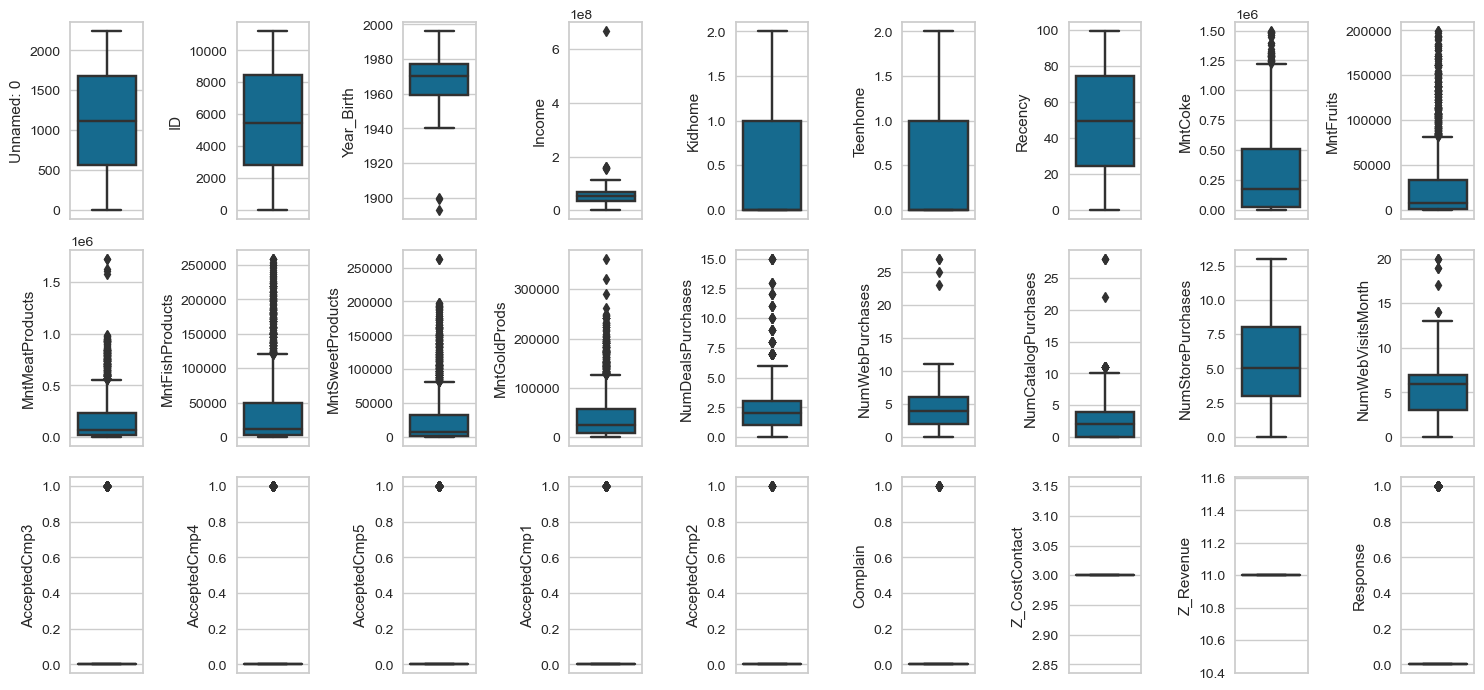

In [9]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()

plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

### **Key Takeaways**

Berikut adalah key takeaways dari data yang diberikan:

- **Jumlah data**
Dataset terdiri dari **30 fitur dan 2240 baris**. Jumlah data yang cukup besar ini memungkinkan untuk dilakukan analisis yang lebih mendalam.

- **Missing value**
Missing value terdapat pada fitur **Income**. Missing value ini perlu ditangani sebelum dilakukan analisis.

- **Data duplikat**
Tidak ada data yang duplikat. Hal ini menunjukkan bahwa data sudah dibersihkan dengan baik.

- **Outlier**
Secara keseluruhan data cenderung memiliki outlier. Nilai ekstrim terlihat pada fitur **Income dan Year_Birth**. Outlier ini perlu ditangani agar tidak mempengaruhi hasil analisis.

- **Analisis konversi rate**
Pada tahap Exploratory Data Analysis, akan dilakukan analisis konversi rate. Analisis ini bertujuan untuk mencari wawasan dari data persentase pengunjung sebuah situs web dan tindakan apa yang mereka lakukan selama mengunjungi situs tersebut, serta apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama kunjungan di situs web tersebut.

- **Proses pembersihan data dan pengembangan fitur**
Sebelum melakukan analisis konversi rate, akan dilakukan proses pembersihan data (data cleaning) dan pengembangan fitur (feature engineering) pada variabel data yang ada. Hal ini dilakukan untuk menghasilkan sebuah kolom baru yang disebut Conversion rate, serta beberapa kolom fitur lain seperti umur, penghasilan, pengeluaran, dan sebagainya. Dengan adanya fitur-fitur ini, diharapkan dapat menemukan pola perilaku konsumen yang dapat memberikan informasi berharga dalam analisis konversi rate.

### **Rekomendasi**

Berdasarkan key takeaways yang telah disebutkan, berikut adalah beberapa rekomendasi untuk analisis data yang akan dilakukan:

- **Penanganan missing value**
Missing value pada fitur Income dapat ditangani dengan menggunakan metode imputation, seperti mean imputation atau median imputation. Metode imputation yang dipilih harus disesuaikan dengan karakteristik data.

- **Penanganan outlier**
Outlier pada fitur Income dan Year_Birth dapat ditangani dengan menggunakan metode outlier detection, seperti metode IQR. Metode outlier detection yang dipilih harus disesuaikan dengan karakteristik data.

- **Pengembangan fitur**
Pengembangan fitur baru dapat dilakukan dengan menggunakan metode feature engineering. Metode feature engineering yang dipilih harus disesuaikan dengan tujuan analisis yang ingin dilakukan.

Dengan melakukan penanganan missing value, penanganan outlier, dan pengembangan fitur, diharapkan data yang digunakan untuk analisis konversi rate menjadi lebih bersih dan akurat. Hal ini dapat menghasilkan analisis yang lebih berkualitas dan memberikan informasi yang lebih berharga bagi perusahaan.